In [23]:
from ml_aos.lightning import WaveNet
from ml_aos.dataloader import Donuts
import matplotlib.pyplot as plt

In [20]:
model=WaveNet.load_from_checkpoint('/astro/users/driemann/ml-aos/lightning_logs/version_1/checkpoints/epoch=96-step=14647.ckpt')
model.eval()

WaveNet(
  (donut_net): DonutNet(
    (layers): ModuleList(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
          )
          (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
        )
      )
      (4): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(16, 16, kernel_size=(3, 3

In [40]:
train=Donuts()
train[0]
dof_pred=model(train[0]['image'][None, ...], train[0]['intrafocal'][None, ...])

In [46]:
test=Donuts('test')

In [22]:
train[0]

{'image': tensor([[[ 8.8879e+00, -2.1953e-01, -9.0376e+00,  ...,  8.0076e+00,
           -8.6569e-03, -3.8262e+00],
          [-5.6099e+00, -1.3910e+00, -7.9312e+00,  ...,  1.1286e+01,
            3.9164e+00,  1.1156e+01],
          [-1.7998e+01,  1.6689e+00, -7.8494e+00,  ..., -7.5903e+00,
            1.4763e+01,  4.3858e+00],
          ...,
          [-1.7884e+01, -1.3877e+01, -1.9155e+00,  ..., -1.9408e+00,
           -6.6753e+00,  1.6884e+00],
          [-4.1376e+00, -2.1604e+01, -6.0522e+00,  ...,  1.3178e+00,
           -1.2686e+01,  2.6322e+00],
          [-1.5879e+01, -1.4072e+01, -1.3948e+00,  ..., -1.0720e+01,
           -1.0616e+01, -1.0294e+01]]]),
 'intrafocal': tensor([0.]),
 'dof': tensor([-3.1072e-04,  3.2790e-05,  8.7172e-04,  1.0000e+00,  0.0000e+00,
         -6.2345e-09, -9.0124e-14,  1.0000e+00, -1.4456e-05,  6.2345e-09,
          1.4456e-05,  1.0000e+00])}

In [18]:
train[0]['intrafocal'][None, ...]train[0]['intrafocal'][None, ...]

tensor([[0.]])

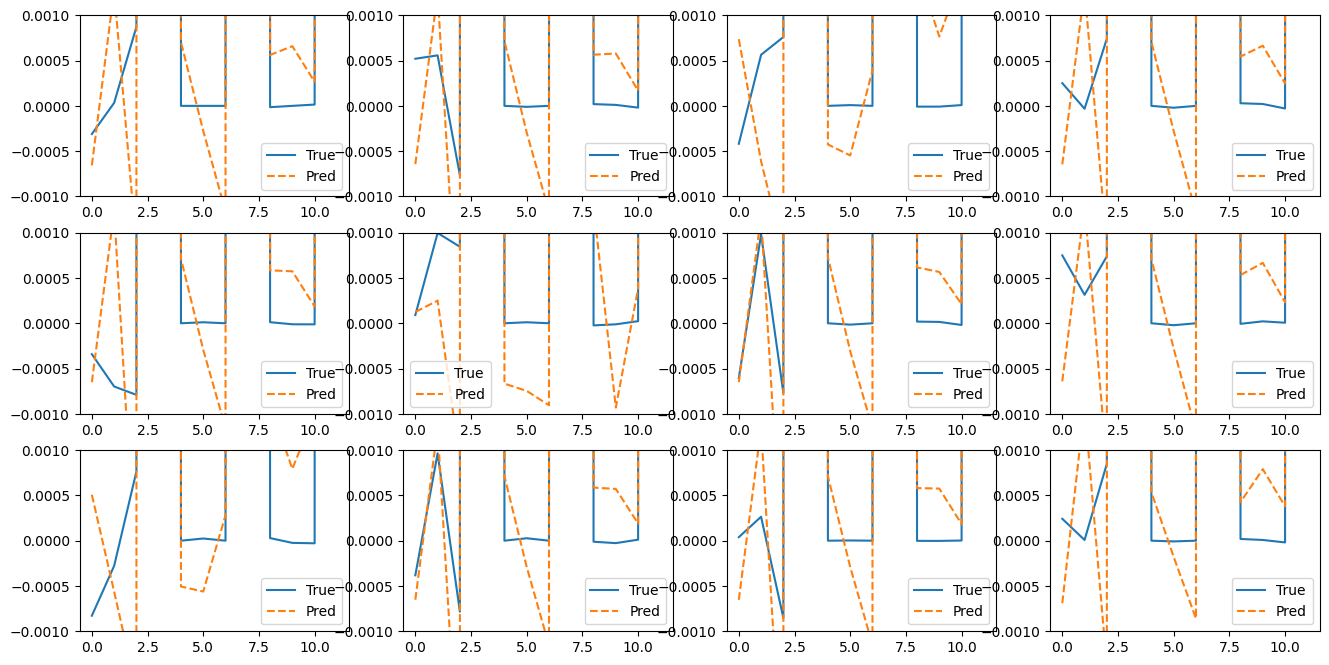

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
for i,ax in enumerate(axes.flatten()):
    ax.plot(train[i]['dof'], label="True")
    dof_pred=model(train[i]['image'][None, ...], train[i]['intrafocal'][None, ...])
    ax.plot(dof_pred.detach().numpy().flatten(), ls='--', label='Pred')
    ax.legend()
    ax.set(ylim=(-1E-3, +1E-3))
    
    
#axes.plot(train[0]['dof'], label="True")
#axes.plot(opd_pred.detach().numpy().flatten(), ls="--", label="Pred")
#axes.legend()

In [39]:
axes.flatten()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

array([-6.5651350e-04,  1.2763143e-03, -1.5543327e-03,  1.0001717e+00,
        7.0376322e-04, -2.7675927e-04, -1.1626557e-03,  9.9913812e-01,
        5.6175888e-04,  6.5888092e-04,  2.6574358e-04,  9.9930656e-01],
      dtype=float32)

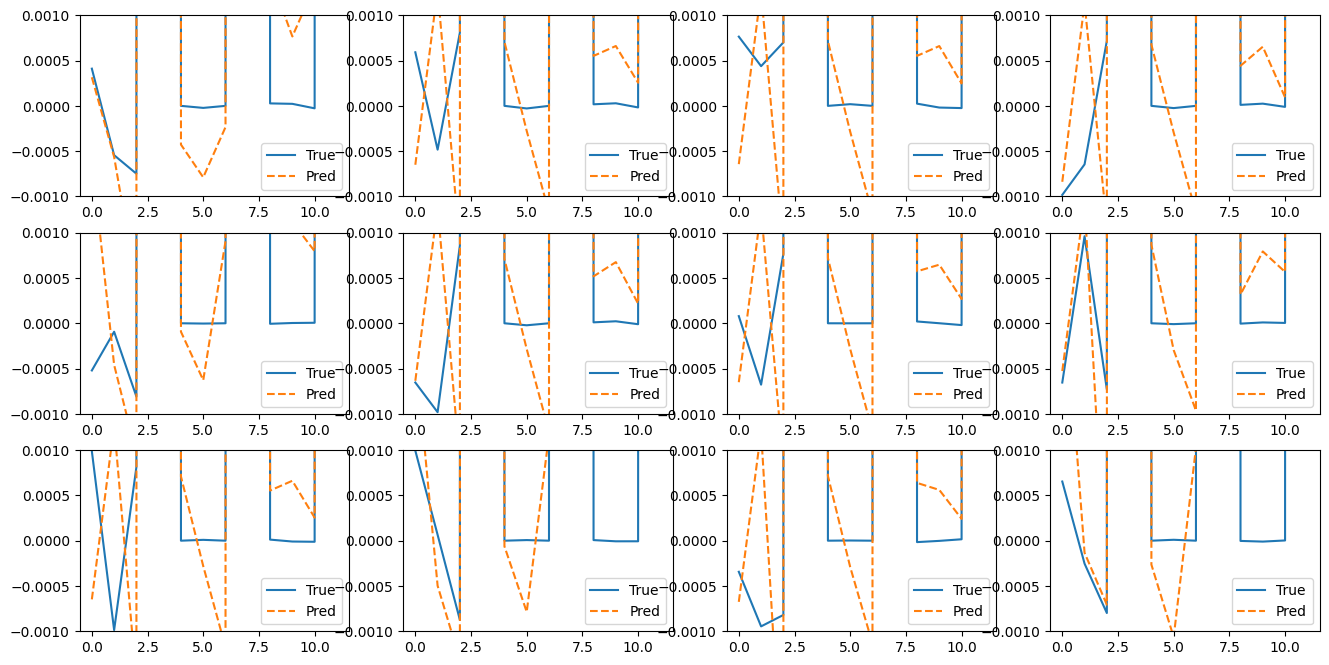

In [48]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
for i,ax in enumerate(axes.flatten()):
    ax.plot(test[i]['dof'], label="True")
    dof_pred=model(test[i]['image'][None, ...], test[i]['intrafocal'][None, ...])
    ax.plot(dof_pred.detach().numpy().flatten(), ls='--', label='Pred')
    ax.legend()
    ax.set(ylim=(-1E-3, +1E-3))
    